In [1]:
import numpy as np
import matplotlib.pyplot as plt
class MDP:
    def __init__(self):
        self.states = ['s0', 's1', 's2']
        self.actions = ['a0', 'a1']

        # Transition probabilities (next_state, probability)
        self.transitions = {
            's0': {
                'a0': [('s1', 0.8), ('s2', 0.2)],
                'a1': [('s0', 1.0)]
            },
            's1': {
                'a0': [('s0', 0.5), ('s2', 0.5)],
                'a1': [('s1', 1.0)]
            },
            's2': {
                'a0': [('s0', 1.0)]
            }
        }

        # Rewards for each (state, action, next_state) pair
        self.rewards = {
            ('s0', 'a0', 's1'): 5,
            ('s0', 'a0', 's2'): 10,
            ('s0', 'a1', 's0'): 1,
            ('s1', 'a0', 's0'): 3,
            ('s1', 'a0', 's2'): 2,
            ('s1', 'a1', 's1'): 0,
            ('s2', 'a0', 's0'): 4,
        }


In [2]:
class MDPWithExpectedRewardsTriples(MDP):
    def __init__(self):
        super().__init__()

    def expected_reward_triplet(self, state, action, next_state):
        expected_reward = 0
        if (state, action, next_state) in self.rewards:
            # Assuming rewards is a dictionary of (state, action, next_state) -> reward
            reward = self.rewards[(state, action, next_state)]
            expected_reward += reward
        return expected_reward

# Create MDP instance with expected rewards for triples calculation
mdp_expected_rewards_triples = MDPWithExpectedRewardsTriples()

# Example usage
state = 's0'
action = 'a0'
next_state = 's1'
expected_reward_value = mdp_expected_rewards_triples.expected_reward_triplet(state, action, next_state)
print(f"Expected Reward r({state}, {action}, {next_state}) = {expected_reward_value}")


Expected Reward r(s0, a0, s1) = 5


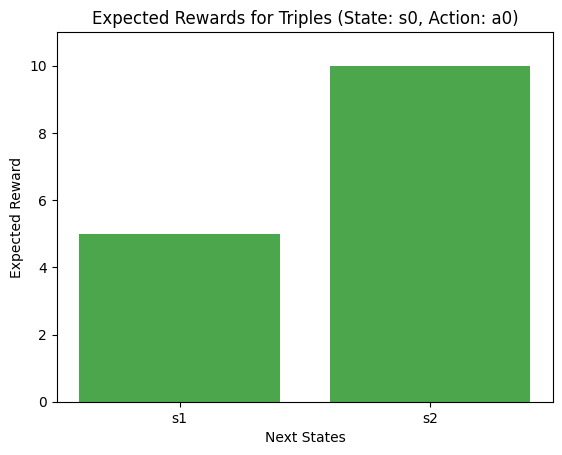

In [3]:
def plot_expected_rewards_triples(mdp_instance, state, action):
    next_states = []
    expected_rewards = []

    for next_state in mdp_instance.transitions.get(state, {}).get(action, []):
        expected_reward = mdp_instance.expected_reward_triplet(state, action, next_state[0])
        next_states.append(next_state[0])
        expected_rewards.append(expected_reward)

    x = np.arange(len(next_states))

    plt.bar(x, expected_rewards, tick_label=next_states, color='g', alpha=0.7)
    plt.xlabel('Next States')
    plt.ylabel('Expected Reward')
    plt.title(f'Expected Rewards for Triples (State: {state}, Action: {action})')
    plt.ylim(0, max(expected_rewards) + 1)
    plt.show()

# Example usage
plot_expected_rewards_triples(mdp_expected_rewards_triples, 's0', 'a0')
